In [3]:
import sys as _sys
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [77]:
# Load the synthetic data
base_path = r'C:\Users\Jonahmad\Downloads'
file_name= f'MF_phase_diagram_with_labels_GPa.csv'
file_path= f'{base_path}\\{file_name}'
data = pd.read_csv(file_path)

# Extract features (Composition, Temperature, and Pressure) and labels
X = data[['Composition_Percent_MgO', 'Temperature_K', 'Pressure_GPa']].values
y = data['Label'].values

In [78]:
# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [79]:
# Construct fully connected neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(3,)),  # Three inputs: Composition, Temperature and Pressure
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output for binary classification
])

C:\Users\Jonahmad\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [81]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2,  # Use 20% of training data for validation
                    verbose=1)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7670 - loss: 0.6104 - val_accuracy: 0.8241 - val_loss: 0.4797
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.8022 - loss: 0.5023 - val_accuracy: 0.8241 - val_loss: 0.4777
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.7960 - loss: 0.5064 - val_accuracy: 0.8241 - val_loss: 0.4710
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.7885 - loss: 0.5086 - val_accuracy: 0.8241 - val_loss: 0.4540
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.7883 - loss: 0.4980 - val_accuracy: 0.8241 - val_loss: 0.4386
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.7927 - loss: 0.4737 - val_accuracy: 0.8276 - val_loss: 0.4215
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.8018 - loss: 0.4368 - val_accuracy: 0.8276 - val_loss: 0.3805
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.7986 - loss: 0.4221 - val_accura

In [82]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.8198 - loss: 0.2833
Test Loss: 0.2725, Test Accuracy: 0.8315


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step


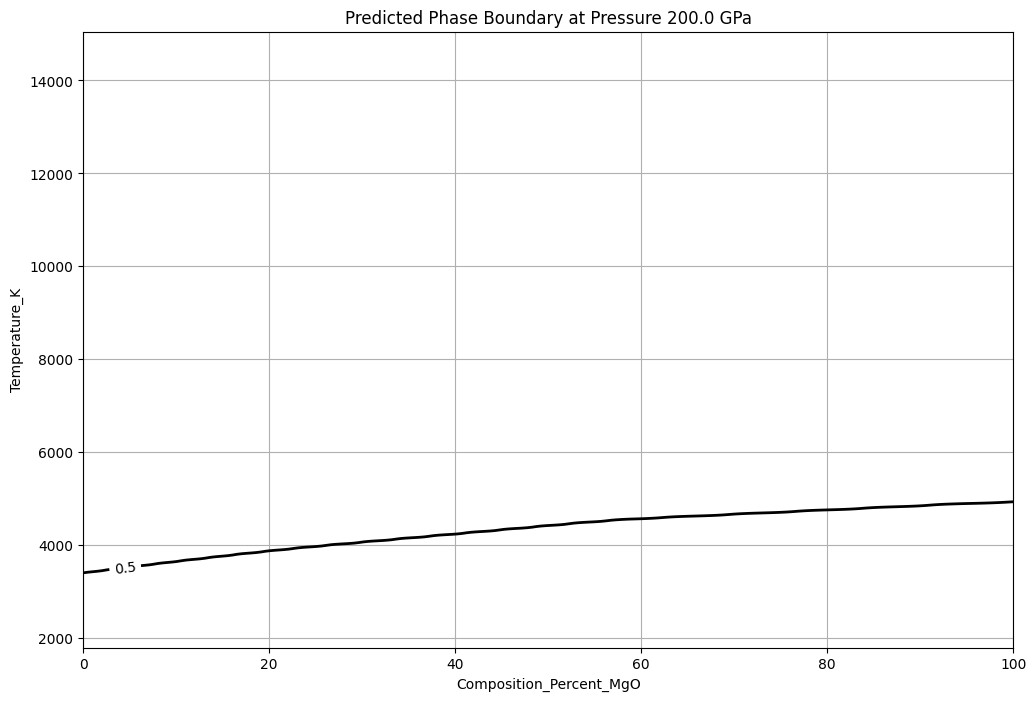

In [86]:
# Enter new pressure to predict phase boundaries 
new_pressure = float(input("Enter a new pressure to predict phase boundaries (e.g., 5.0): "))

# Generate a grid of composition and temperature points for predictions
composition_range = np.linspace(data['Composition_Percent_MgO'].min(), data['Composition_Percent_MgO'].max(), 200)
temperature_range = np.linspace(data['Temperature_K'].min(), data['Temperature_K'].max(), 200)
P, T = np.meshgrid(composition_range, temperature_range)
grid_points = np.c_[P.ravel(), T.ravel(), np.full(P.ravel().shape, new_pressure)]

# Normalize grid points using the same scaler as the training data
grid_points_scaled = scaler.transform(grid_points)

# Predict phase boundary probabilities for the grid points
boundary_predictions = model.predict(grid_points_scaled).reshape(P.shape)

# Plot the predicted phase diagram
plt.figure(figsize=(12, 8))
contour = plt.contour(P, T, boundary_predictions, levels=[0.5], colors='black', linewidths=2)
plt.clabel(contour, inline=True, fontsize=10)

# Add color bar and labels
plt.xlabel('Composition_Percent_MgO')
plt.ylabel('Temperature_K')
plt.title(f'Predicted Phase Boundary at Pressure {new_pressure} GPa')
plt.grid()
plt.show()